In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sqlite3 as sql

%matplotlib inline

In [2]:
may = pd.read_pickle("C:/Users/6106057/nss-data-analytics/projects/nashville-scooters-scooter-snatchers/data/may.pkl")
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,Bird
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,Bird
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,Bird
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,Bird


In [3]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ GB


In [4]:
may.shape

(20283582, 6)

In [5]:
may.loc[(may['sumdid'] == 'Powered515')] ##lot of duplicated 

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
1150,2019-05-01 00:04:48.030,36.121581,-86.770304,Powered515,3.0,Gotcha
3318,2019-05-01 00:09:48.257,36.121581,-86.770304,Powered515,3.0,Gotcha
5542,2019-05-01 00:14:48.537,36.121581,-86.770304,Powered515,3.0,Gotcha
7716,2019-05-01 00:19:48.763,36.121581,-86.770304,Powered515,3.0,Gotcha
9911,2019-05-01 00:24:49.147,36.121581,-86.770304,Powered515,3.0,Gotcha
...,...,...,...,...,...,...
20277223,2019-05-31 23:37:12.950,36.121581,-86.770304,Powered515,3.0,Gotcha
20280669,2019-05-31 23:42:13.147,36.121581,-86.770304,Powered515,3.0,Gotcha
20284093,2019-05-31 23:47:13.240,36.121581,-86.770304,Powered515,3.0,Gotcha
20287541,2019-05-31 23:52:13.357,36.121581,-86.770304,Powered515,3.0,Gotcha


In [6]:
may.companyname.value_counts()

Lime      7111655
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [12]:
may_1 = may[['sumdid','companyname']]
may_2 = may_1.drop_duplicates()
may_2.shape

(8303, 2)

In [13]:
co_name = may_2.companyname.value_counts()
co_name = co_name.reset_index()
co_name = co_name.rename(columns = {'index':'company_name', 'companyname':'num'})
co_name.head(10)

,company_name,num
0,Bird,3064
1,Lime,1631
2,Lyft,1376
3,Jump,976
4,Spin,687
5,Bolt,346
6,Gotcha,223


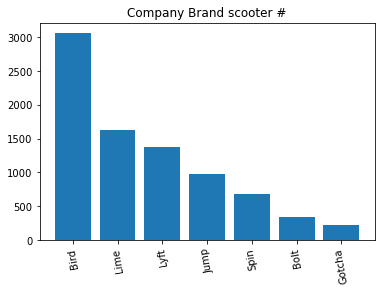

In [14]:
plt.bar('company_name', 'num', data = co_name)
plt.xticks(rotation = 100)
plt.title('Company Brand scooter #');

In [10]:
may_2 = may_1.groupby(["companyname"]).count()
may_2.shape

(7, 1)

In [15]:
may_dead = may.loc[may['chargelevel'] == 0.00]
may_dead.info() #- in this one doesn't have duplicated but the time zone is different

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025190 entries, 1077 to 20292041
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   pubdatetime  1025190 non-null  datetime64[ns]
 1   latitude     1025190 non-null  float64       
 2   longitude    1025190 non-null  float64       
 3   sumdid       1025190 non-null  object        
 4   chargelevel  1025190 non-null  float64       
 5   companyname  1025190 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 54.8+ MB


In [16]:
may_dead.companyname.unique() 

array(['Gotcha', 'Lime', 'Spin', 'Jump', 'Bolt'], dtype=object)

In [17]:
may_dead['date'] = may_dead['pubdatetime'].dt.date
may_dead.head()

<ipython-input-17-d4eb1ee679e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_dead['date'] = may_dead['pubdatetime'].dt.date


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,date
1077,2019-05-01 00:04:48.030,36.162910,-86.776332,Powered406,0.0,Gotcha,2019-05-01
1084,2019-05-01 00:04:48.030,36.152102,-86.762997,Powered785,0.0,Gotcha,2019-05-01
1093,2019-05-01 00:04:48.030,36.156370,-86.786350,Powered412,0.0,Gotcha,2019-05-01
1095,2019-05-01 00:04:48.030,36.121324,-86.770482,Powered826,0.0,Gotcha,2019-05-01
1096,2019-05-01 00:04:48.030,36.121522,-86.770209,Powered769,0.0,Gotcha,2019-05-01


In [18]:
may_dead.loc[(may['sumdid'] == 'Powered406')]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,date
1077,2019-05-01 00:04:48.030,36.162910,-86.776332,Powered406,0.0,Gotcha,2019-05-01
3427,2019-05-01 00:09:48.257,36.162910,-86.776332,Powered406,0.0,Gotcha,2019-05-01
5498,2019-05-01 00:14:48.537,36.162910,-86.776332,Powered406,0.0,Gotcha,2019-05-01
7752,2019-05-01 00:19:48.763,36.162910,-86.776332,Powered406,0.0,Gotcha,2019-05-01
9931,2019-05-01 00:24:49.147,36.162910,-86.776332,Powered406,0.0,Gotcha,2019-05-01
...,...,...,...,...,...,...,...
18824347,2019-05-30 13:55:56.267,36.162352,-86.774037,Powered406,0.0,Gotcha,2019-05-30
18828158,2019-05-30 14:00:56.367,36.162352,-86.774037,Powered406,0.0,Gotcha,2019-05-30
18831987,2019-05-30 14:05:56.797,36.162352,-86.774037,Powered406,0.0,Gotcha,2019-05-30
18835706,2019-05-30 14:10:56.923,36.162352,-86.774037,Powered406,0.0,Gotcha,2019-05-30


In [19]:
may_dead_1 = may_dead[['sumdid','latitude','longitude','date']]
may_dead_1.shape

(1025190, 4)

In [20]:
may_dead_1 = may_dead_1.drop_duplicates()
may_dead_1.head()

,sumdid,latitude,longitude,date
1077,Powered406,36.162910,-86.776332,2019-05-01
1084,Powered785,36.152102,-86.762997,2019-05-01
1093,Powered412,36.156370,-86.786350,2019-05-01
1095,Powered826,36.121324,-86.770482,2019-05-01
1096,Powered769,36.121522,-86.770209,2019-05-01


In [21]:
p406 = may_dead_1.loc[(may_dead_1['sumdid'] == 'Powered406')]
print(p406) ##duplicated location will be found becasue it will be pushed round from A -> B by pepople before it picked up. 

              sumdid   latitude  longitude        date
1077      Powered406  36.162910 -86.776332  2019-05-01
232158    Powered406  36.162673 -86.776055  2019-05-01
235446    Powered406  36.161981 -86.776383  2019-05-01
238791    Powered406  36.162374 -86.776544  2019-05-01
569202    Powered406  36.162374 -86.776544  2019-05-02
...              ...        ...        ...         ...
15938375  Powered406  36.121202 -86.770352  2019-05-27
15945397  Powered406  36.121248 -86.770175  2019-05-27
15952367  Powered406  36.121240 -86.770317  2019-05-27
18742422  Powered406  36.162286 -86.774082  2019-05-30
18782753  Powered406  36.162352 -86.774037  2019-05-30

[207 rows x 4 columns]


In [22]:
may_dead_1 = may_dead_1.round({'latitude': 3})
may_dead_1 = may_dead_1.round({'longitude': 3})

In [23]:
dead_group = may_dead_1.groupby(["latitude", "longitude"]).count()
dead_group.head()

,,sumdid,date
latitude,longitude,,
0.000,0.000,3,3
34.414,-81.706,1,1
35.219,-82.193,1,1
35.541,-82.780,1,1
35.552,-82.818,1,1


In [24]:
dead_group.sumdid.value_counts()

1       999
2       332
3       194
4       140
5        96
       ... 
54        1
50        1
40        1
2085      1
711       1
Name: sumdid, Length: 102, dtype: int64

In [25]:
dead_10 = dead_group.sort_values('sumdid',ascending = False).head(10).reset_index()
print(dead_10)

   latitude  longitude  sumdid  date
0    36.120    -86.753    5070  5070
1    36.134    -86.792    2085  2085
2    36.120    -86.754    1960  1960
3    36.121    -86.770    1002  1002
4    36.176    -86.754     711   711
5    36.156    -86.776     349   349
6    36.158    -86.767     326   326
7    36.174    -86.786     321   321
8    36.160    -86.776     259   259
9    36.121    -86.771     198   198


Make the graph for the loctions of the dead scooter reported 

In [27]:
import folium

In [28]:
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start=12)

In [32]:
for ind, row in dead_10.iterrows():
    point = [row['latitude'], row['longitude']]
    message = row['sumdid']
    folium.Marker(location = point, popup = message).add_to(nash_map)

nash_map